<a href="https://colab.research.google.com/github/JanPastorek/1-AIN-152-22-LinearAlgebra/blob/main/2_Geometric_view_of_linear_algebra_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

+ This notebook is part of the addition lecture *Geometric view of linear algebra* in the OCW MIT course 18.06 by Prof Gilbert Strang [1]
+ Created by me, Dr Juan H Klopper
    + Specialist Surgeon
    + Groote Schuur Hospital
    + Senior Lecturer in Surgery and Biostatistics & Machine Learning
    + University Cape Town
    + <a href="mailto:juan.klopper@uct.ac.za">Email me with your thoughts, comments, suggestions and corrections</a>
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" href="http://purl.org/dc/dcmitype/InteractiveResource" property="dct:title" rel="dct:type">Linear Algebra OCW MIT18.06</span> <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">IPython notebook [2] study notes by Dr Juan H Klopper</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

+ [1] <a href="http://ocw.mit.edu/courses/mathematics/18-06sc-linear-algebra-fall-2011/index.htm">OCW MIT 18.06</a>
+ [2] Fernando Pérez, Brian E. Granger, IPython: A System for Interactive Scientific Computing, Computing in Science and Engineering, vol. 9, no. 3, pp. 21-29, May/June 2007, doi:10.1109/MCSE.2007.53. URL: http://ipython.org

In [ ]:
!pip --version

pip 25.0.1 from C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\site-packages\pip (python 3.12)



In [ ]:
from IPython.core.display import HTML
css_file = 'style.css'
HTML(open(css_file, 'r').read())

![SegmentLocal](KRG_elegant_logo_for_light_BG.png "segment")
![SegmentLocal](UCT_logo.gif "segment")

In [ ]:
# Comments will be in this form
# Comments are not executed

# Geometrical view

## Preamble

## System of linear equations

Most courses and textbooks introduce linear algebra to solve systems of linear equations.  _Linear equations_ have independent variables that are each of power one and not transcendental.  Example are shown in (1) below.

$$ \begin{align} {2x}-{y}&={3} \\ -{x} + 2{y} &= {0} \end{align} \tag{1} $$

Solving systems of linear equations attempts at finding numerical solutions for the variables taht solve all the equations in the linear system.  A solution to (1) is shown in (2) below.

$$\begin{align}2 &\left( 2 \right) - 1 \left( 1 \right) = 3 \\ - &\left( 2 \right) + 2 \left( 1 \right) = 0\end{align}\tag{2}$$

We can create an _augmented matrix_ from the system in (1).  To do this, we create a matrix of coefficients, including those from both sides of the equations.  We store the matrix as a computer variable called `A_augm`.

In [ ]:
from sympy import Matrix

In [ ]:
A_augm = Matrix([[2, -1, 3], [-1, 2, 0]]) # Note the placement of ()'s and []'s
A_augm # A_augm is a computer variable that contains the matrix

Matrix([
[ 2, -1, 3],
[-1,  2, 0]])

Because `A_augm` was created using the `Matrix()` function from `sympy`, it is an instance of this type.  The `type()` indicates it more specificically as a _mutable, dense matrix_.  Mutable means that we can change the values of the elements (coefficients in this case) and dense because the value of each position in the matrix is stored.  (when there are many zeros, the a sparse matrix can be created, that only stores the values that are not zero and their positions.)

In [ ]:
# We can ask python what type of computer variable A_augm holds
type(A_augm)  # We see that it is a mutable dense matrix

sympy.matrices.dense.MutableDenseMatrix

We can also create a _matrix of coefficients_.  It includes only ethe left-hand side coefficients.

In [ ]:
A = Matrix([[2, -1], [-1, 2]])  # Matrix of coefficients
A

Matrix([
[ 2, -1],
[-1,  2]])

The variables (unknowns) can be expressed as a column vector, saved as the computer variable `x_vect` below.  First, we specify the variable `x` and `y` as mathematical variables using the `symbols()` function.

In [ ]:
from sympy import symbols

In [ ]:
x, y, z = symbols('x y z') # Creating symbolic mathematical variables as opposed to computer variables
# These symbols can no longer be used as computer variable names

In [ ]:
x_vect = Matrix([x, y])
x_vect

Matrix([
[x],
[y]])

The same goes for the column vector of solutions, saved as the computer variable `b_vect`.

In [ ]:
b_vect = Matrix([3, 0])
b_vect

Matrix([
[3],
[0]])

In (3) below we see the matrix times the column vector results in the vector of solutions.  The (row, column) sizes are also shown.

$$ \begin{align} A_{2 \times 2} \quad \mathbf{x}_{2 \times 1} = \mathbf{b}_{2 \times 1} \\ \\ \begin{bmatrix} 2 && -1 \\ -1 && 2 \end{bmatrix} \begin{bmatrix} x \\ y\end{bmatrix} = \begin{bmatrix} 3 \\ 0 \end{bmatrix} \end{align} \tag{3}$$

The `Eq()` function is used below to do the matrix times the vector on the left-hand side (resulting in a column vector) and the solution vector on the right.  It gives a visual idea of how we use linear algebra to solve these systems.

In [ ]:
from sympy import Eq

In [ ]:
Eq(A * x_vect, b_vect) # From Ax = b
# The Eq function takes the arguments left-hand-side (LHS), right-handside (RHS) of the equation

Eq(Matrix([
[ 2*x - y],
[-x + 2*y]]), Matrix([
[3],
[0]]))

## The row picture

Each linear equation above is an equation of a straight line.  This represents the _row picture_ of a linear system.  The solutions to both equations is at the point where they cross.  Have a look at the plot below. Don't be too concerned about the code for plotting.  It does not form part of this series of notebooks.

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

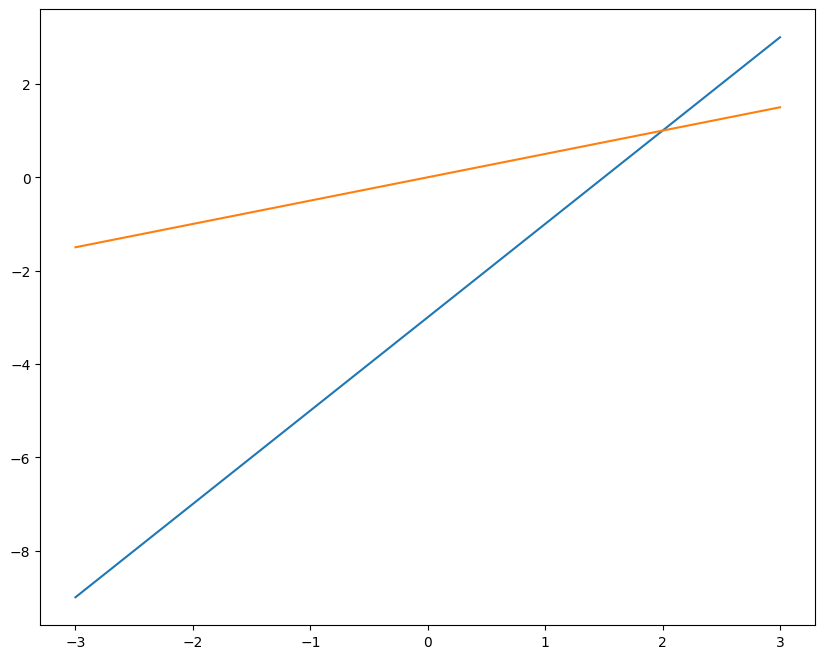

In [ ]:
x_vals = np.linspace(-3, 3, 100) # Create 100 values between -3 and 3
# Note that we cannot use the computer variable x, because it has been reserved above as a mathematical variable in
# the symbols function

plt.figure(figsize = (10,8)) # Create a graph of size 10 by 8
plt.plot(x_vals, 2 * x_vals - 3) # Plot every single value created above with 2 times that values
# Taken from the first equation which was y = 2x or f(x) = 2x
# The plot takes the arguments (code between parentheses) of x,y
plt.plot(x_vals, ((x_vals / 2))) # Also plot the second equation
plt.show; # Draw the plot on screen

We note that the two line cross at the point $\left( 2, 1 \right)$.  It should be clear that there are three possible outcomes for a system with two variables and two equations.  Either the lines cross with a single solution, or they do not cross at all (parallel lines), with no solutions, or they coincide, with infinitely many solutions.

## The column picture

We can view the same system as a vector problem.  Here the coefficients of each separate variable as a column vector.  This problem now becomes a linear combination of vectors.  We are thus asking how many (scalar multiplication) of one vector plus how many of the other vector will equal the vector on the right hand side.  This should be clear from (4) below.

$$ x\begin{bmatrix} 2 \\ -1 \end{bmatrix}+y\begin{bmatrix} -1 \\ 2 \end{bmatrix}=\begin{bmatrix} 3 \\ 0 \end{bmatrix} \tag{4}$$

As before, we create separate computer variables and show that the end-result is the same.

In [ ]:
x_var_vect = Matrix([2, -1])
x_var_vect

Matrix([
[ 2],
[-1]])

In [ ]:
y_var_vect = Matrix([-1, 2])
y_var_vect

Matrix([
[-1],
[ 2]])

In [ ]:
Eq(x * x_var_vect + y * y_var_vect, b_vect)

Eq(Matrix([
[ 2*x - y],
[-x + 2*y]]), Matrix([
[3],
[0]]))

In the image below, we see the two vectors (blue and green) and the resultant vector (orange).

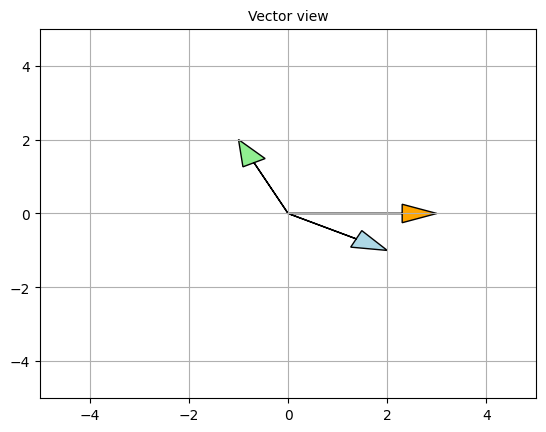

In [ ]:
ax = plt.axes()

ax.arrow(0.0, 0.0, 2.0, -1.0,
        length_includes_head=True,
        head_width=0.5,
         head_length=0.7,
         fc='lightblue',
         ec='black')
ax.arrow(0.0, 0.0, -1.0, 2.0,
        length_includes_head=True,
        head_width=0.5,
        head_length=0.7,
        fc='lightgreen',
        ec='black')
ax.arrow(0.0, 0.0, 3.0, 0.0,
        length_includes_head=True,
        head_width=0.5,
         head_length=0.7,
         fc='orange',
         ec='black')

plt.grid()

plt.xlim(-5,5)
plt.ylim(-5,5)

plt.title('Vector view',fontsize=10)

plt.show();

We know that it takes twice the blue vector and one time the green vector to give us the orange vector.

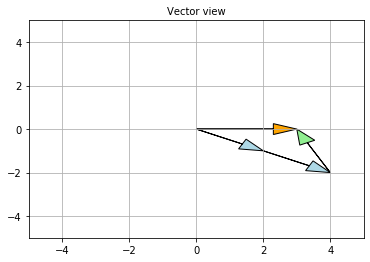

In [ ]:
ax = plt.axes()

ax.arrow(0.0, 0.0, 2.0, -1.0,
        length_includes_head=True,
        head_width=0.5,
         head_length=0.7,
         fc='lightblue',
         ec='black')
ax.arrow(2.0, -1.0, 2.0, -1.0,
        length_includes_head=True,
        head_width=0.5,
         head_length=0.7,
         fc='lightblue',
         ec='black')

ax.arrow(4.0, -2.0, -1.0, 2.0,
        length_includes_head=True,
        head_width=0.5,
        head_length=0.7,
        fc='lightgreen',
        ec='black')
ax.arrow(0.0, 0.0, 3.0, 0.0,
        length_includes_head=True,
        head_width=0.5,
         head_length=0.7,
         fc='orange',
         ec='black')

plt.grid()

plt.xlim(-5,5)
plt.ylim(-5,5)

plt.title('Vector view',fontsize=10)

plt.show();

It should be very clear that the two vectors are special in that linear combinations of them will allow us to fill a plane in $\mathbb{R}^{2}$ (in which they both lie).

It should also be clear to see that these two vectors are not linear combinations of each other.  If this were so, they are linearly independent and linear combinations of them fill only a line in $\mathbb{R}$.

We can imagine that the $xy$-plane is filled with (all the points are created by) vectors, i.e. I can find any coordinate by drawing a vector to it.  All these vectors together can be called a _set_ and they fill $\mathbb{R}^{2}$.  Later we will learn about _basis vectors_ and how they _span_ a space.

## The 3-space picture

To end this section, we take a look at the three equation with three variables.

$$ \begin{align} {3x}+{2y}-{z}&=2 \\ {x}-{2y}-{z}&=3 \\ {2x}+{y}-{z}&={1} \end{align} \tag{5}$$

We can create an augmented matrix from the coefficents, stored in the computer variable `A_augm` below.

In [ ]:
A_augm = Matrix([[3, 2, -1, 2], [1, -2, -1, 3], [2, 1, -1, 1]])
A_augm

Matrix([
[3,  2, -1, 2],
[1, -2, -1, 3],
[2,  1, -1, 1]])

The `.rref()` method will quickly solve the linear system for use.

In [ ]:
A_augm.rref()

(Matrix([
 [1, 0, 0,  5/2],
 [0, 1, 0, -3/2],
 [0, 0, 1,  5/2]]), (0, 1, 2))

The solution is where three planes in $\mathbb{R}^{3}$ _cross_.  We can once again imagine that the planes (each equation) may never cross or lie on-top of each other.  Below is an image of three planes crossing at one point.

In [ ]:
from sympy.plotting import plot3d

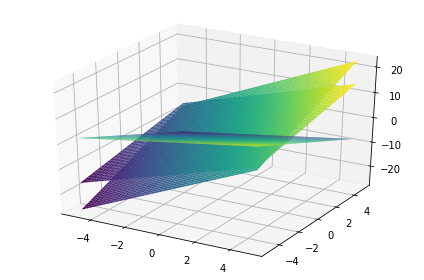

In [ ]:
plot3d((3*x+2*y-2, (x,-5,5), (y,-5,5)),
      (x-2*y-3, (x,-5,5), (y,-5,5)),
      (2*x+y-1, (x,-5,5), (y,-5,5)));

As before, we can view this problem as a column picture.

# Interactive exploration of basic concepts

In [1]:

import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython.display import display, Markdown, clear_output

# --------------------
# Helper computations
# --------------------


def dot(a, b):
    return float(np.dot(a, b))


def cross2d_scalar(a, b):
    """2D 'vector product' (z-component of 3D cross product)."""
    return float(a[0]*b[1] - a[1]*b[0])


def angle_between(a, b):
    na = np.linalg.norm(a)
    nb = np.linalg.norm(b)
    if na == 0 or nb == 0:
        return np.nan
    c = np.clip(dot(a, b)/(na*nb), -1.0, 1.0)
    return float(np.degrees(np.arccos(c)))


def apply_lin_transform(M, v):
    return M @ v


def det2(M):
    return float(np.linalg.det(M))


def projection(a, b):
    """Projection of a onto b (vector)."""
    bb = dot(b, b)
    if bb == 0:
        return np.array([np.nan, np.nan], dtype=float)
    return (dot(a, b)/bb) * b


def make_slider(description, vmin, vmax, vinit):
    return widgets.IntSlider(
        value=vinit, min=vmin, max=vmax, step=1, description=description, continuous_update=False
    )


# Vector sliders
ax = make_slider("a_x", -10, 10, 2)
ay = make_slider("a_y", -10, 10, 1)
bx = make_slider("b_x", -10, 10, -1)
by = make_slider("b_y", -10, 10, 3)

# Matrix sliders
m11 = make_slider("m11", -5, 5, 1)
m12 = make_slider("m12", -5, 5, 0)
m21 = make_slider("m21", -5, 5, 0)
m22 = make_slider("m22", -5, 5, 1)

# Toggles
normalize_chk = widgets.Checkbox(
    value=False, description="Normalize vectors a and b (unit length)")
show_proj_chk = widgets.Checkbox(
    value=True, description="Show projection of a onto b")
show_parallelogram_chk = widgets.Checkbox(
    value=True, description="Show parallelogram area (|cross|)")

# Buttons
btn_rand_vec = widgets.Button(description="Randomize vectors")
btn_rand_mat = widgets.Button(description="Randomize matrix")
btn_reset = widgets.Button(description="Reset")

# Randomize & Reset
rng = np.random.default_rng()


def on_rand_vec(_):
    ax.value = int(rng.integers(-8, 9))
    ay.value = int(rng.integers(-8, 9))
    bx.value = int(rng.integers(-8, 9))
    by.value = int(rng.integers(-8, 9))


def on_rand_mat(_):
    m11.value = int(rng.integers(-4, 5))
    m12.value = int(rng.integers(-4, 5))
    m21.value = int(rng.integers(-4, 5))
    m22.value = int(rng.integers(-4, 5))


def on_reset(_):
    ax.value, ay.value = 2, 1
    bx.value, by.value = -1, 3
    m11.value, m12.value, m21.value, m22.value = 1, 0, 0, 1
    normalize_chk.value = False
    show_proj_chk.value = True
    show_parallelogram_chk.value = True


btn_rand_vec.on_click(on_rand_vec)
btn_rand_mat.on_click(on_rand_mat)
btn_reset.on_click(on_reset)

# Plotting helpers


def nice_limits(points, pad=1.0):
    arr = np.array(points)
    xmin = np.nanmin(arr[:, 0])
    xmax = np.nanmax(arr[:, 0])
    ymin = np.nanmin(arr[:, 1])
    ymax = np.nanmax(arr[:, 1])
    dx = xmax - xmin
    dy = ymax - ymin
    if dx == 0:
        dx = 1.0
    if dy == 0:
        dy = 1.0
    return (xmin - pad*dx, xmax + pad*dx, ymin - pad*dy, ymax + pad*dy)


def draw_vectors(axplt, vecs, labels, origin=(0, 0)):
    ox, oy = origin
    for v, lbl in zip(vecs, labels):
        axplt.quiver(ox, oy, v[0], v[1], angles="xy",
                     scale_units="xy", scale=1)
        axplt.text(ox + v[0], oy + v[1], f" {lbl}", fontsize=10)


def draw_parallelogram(axplt, a, b, origin=(0, 0)):
    """Draw the parallelogram spanned by a and b (from origin)."""
    O = np.array(origin, dtype=float)
    A = O + a
    B = O + b
    AplusB = O + a + b
    poly = np.vstack([O, A, AplusB, B, O])
    axplt.plot(poly[:, 0], poly[:, 1])


def make_basis(M):
    e1 = M @ np.array([1.0, 0.0])
    e2 = M @ np.array([0.0, 1.0])
    return e1, e2


# Core update function
out_info = widgets.Output()


def update(*_):
    with out_info:
        clear_output(wait=True)

        a = np.array([ax.value, ay.value], dtype=float)
        b = np.array([bx.value, by.value], dtype=float)
        M = np.array([[m11.value, m12.value], [
                     m21.value, m22.value]], dtype=float)

        a_disp = a.copy()
        b_disp = b.copy()
        if normalize_chk.value:
            na = np.linalg.norm(a)
            nb = np.linalg.norm(b)
            if na != 0:
                a_disp = a/na
            if nb != 0:
                b_disp = b/nb

        # Scalars
        dp = dot(a_disp, b_disp)
        cp = cross2d_scalar(a_disp, b_disp)
        ang = angle_between(a_disp, b_disp)
        detM = det2(M)

        # Projections
        proj_a_on_b = projection(a_disp, b_disp)

        # Transform vectors and basis
        aT = apply_lin_transform(M, a_disp)
        bT = apply_lin_transform(M, b_disp)
        e1, e2 = make_basis(M)

        # Text summary
        display(Markdown("### Numeric results"))
        rows = [
            f"- **Vector a** = ({a_disp[0]:.3g}, {a_disp[1]:.3g})",
            f"- **Vector b** = ({b_disp[0]:.3g}, {b_disp[1]:.3g})",
            f"- **Dot product a·b** = {dp:.6g}",
            f"- **Angle between a and b** = {ang:.3g}°" if not np.isnan(
                ang) else "- **Angle between a and b** = undefined (one vector is zero)",
            f"- **2D cross 'vector product' (a×b)_z** = {cp:.6g} (signed area × 1)",
            f"- **Matrix M** = [[{M[0, 0]:.3g}, {M[0, 1]:.3g}], [{M[1, 0]:.3g}, {M[1, 1]:.3g}]]",
            f"- **det(M)** = {detM:.6g}  (area scale; sign shows orientation flip)",
            f"- **Transformed a' = M·a** = ({aT[0]:.3g}, {aT[1]:.3g})",
            f"- **Transformed b' = M·b** = ({bT[0]:.3g}, {bT[1]:.3g})",
        ]
        if show_proj_chk.value:
            rows.append(
                f"- **Projection of a onto b** = ({proj_a_on_b[0]:.3g}, {proj_a_on_b[1]:.3g})")
        display(Markdown("\n".join(rows)))

        # Plot 1: Original vectors
        pts = [
            [0, 0], a_disp, b_disp, a_disp + b_disp, proj_a_on_b
        ]
        x0, x1, y0, y1 = nice_limits(pts, pad=0.2)
        fig1 = plt.figure(figsize=(5, 5))
        ax1 = fig1.gca()
        ax1.set_aspect("equal", adjustable="box")
        ax1.axhline(0)
        ax1.axvline(0)
        draw_vectors(ax1, [a_disp, b_disp], ["a", "b"])
        if show_parallelogram_chk.value:
            draw_parallelogram(ax1, a_disp, b_disp)
        if show_proj_chk.value and np.all(np.isfinite(proj_a_on_b)):
            draw_vectors(ax1, [proj_a_on_b], ["proj\u2090(b)"])
        ax1.set_xlim(x0, x1)
        ax1.set_ylim(y0, y1)
        ax1.set_title("Original vectors (a, b) and constructions")
        ax1.grid(True)
        plt.show()

        # Plot 2: Transformed vectors & new basis
        ptsT = [
            [0, 0], aT, bT, aT + bT, e1, e2
        ]
        x0, x1, y0, y1 = nice_limits(ptsT, pad=0.2)
        fig2 = plt.figure(figsize=(5, 5))
        ax2 = fig2.gca()
        ax2.set_aspect("equal", adjustable="box")
        ax2.axhline(0)
        ax2.axvline(0)
        # Draw transformed canonical basis to visualize the linear map
        draw_vectors(ax2, [e1, e2], ["M·e1", "M·e2"])
        # Draw transformed vectors
        draw_vectors(ax2, [aT, bT], ["a' = M·a", "b' = M·b"])
        if show_parallelogram_chk.value:
            draw_parallelogram(ax2, aT, bT)
        ax2.set_xlim(x0, x1)
        ax2.set_ylim(y0, y1)
        ax2.set_title("After linear transformation (M)")
        ax2.grid(True)
        plt.show()


# Wire up
for w in [ax, ay, bx, by, m11, m12, m21, m22, normalize_chk, show_proj_chk, show_parallelogram_chk]:
    w.observe(update, names="value")

# Initial render
update()

# Layout
vec_box = widgets.VBox(
    [widgets.HTML("<h3>Vectors</h3>"), ax, ay, bx, by, normalize_chk])
mat_box = widgets.VBox(
    [widgets.HTML("<h3>Matrix M (2×2)</h3>"), m11, m12, m21, m22])
toggles = widgets.VBox([widgets.HTML("<h3>Options</h3>"),
                       show_proj_chk, show_parallelogram_chk])

buttons = widgets.HBox([btn_rand_vec, btn_rand_mat, btn_reset])

ui = widgets.HBox([vec_box, widgets.HTML("&nbsp;&nbsp;&nbsp;"),
                  mat_box, widgets.HTML("&nbsp;&nbsp;&nbsp;"), toggles])
display(ui, buttons, out_info)

Output()

# Vector product

In [2]:
!sudo apt update
!sudo apt install libcairo2-dev \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev
!pip install manim
!pip install IPython==8.21.0

Get:1 https://cli.github.com/packages stable InRelease [3,917 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,045 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main all Pack

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.0/810.0 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.1 MB/s eta 0:00:00
  Attempting uninstall: IPython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.21.0 which is incompatible.


In [2]:
from manim import *

In [27]:

%%manim -qm -v WARNING LinearTrans

class LinearTrans(LinearTransformationScene):
    def __init__(self, **kwargs):
        # linear transformation
        matrix = [[2, 1],
                  [0, 1]]
        super().__init__(
            show_coordinates=True,
            leave_ghost_vectors=True,
            # include_background_grid=True,
            **kwargs
        )
        self.matrix = matrix

    def construct(self):
        # Add a sample vector
        vector = Vector([1, 2], color=YELLOW)
        self.add_vector(vector)

        # Apply the linear transformation
        self.apply_matrix(self.matrix)

        # Wait to see the result
        self.wait()

Manim Community v0.19.0

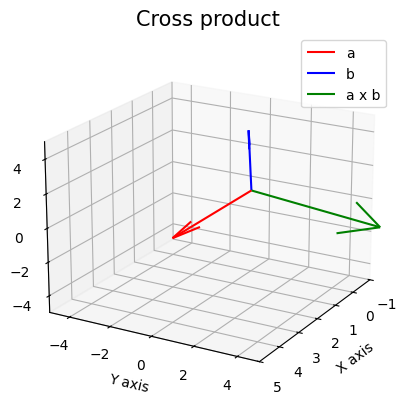

In [ ]:
a = np.array([[2, -2, -2]])
b = np.array([-2, -2, 2])
np.cross(a, b)  # Cross product of a and b

# show in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, a[0, 0], a[0, 1], a[0, 2], color='r', label='a')
ax.quiver(0, 0, 0, b[0], b[1], b[2], color='b', label='b')
ax.quiver(0, 0, 0, *(np.cross(a, b)[0]), color='g', label='a x b')
ax.set_xlim([ -1, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.view_init(elev=20., azim=30)
plt.title('Cross product', fontsize=15)
plt.legend()
plt.show()

## Conclusion

We have seen how linear systems can be viewed as rows or columns and how they can be seen as matrices and vectors.